## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 20px; background-color: #f0f0f0; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
   <div style="display: flex; align-items: flex-start;">
      <div style="flex: 1;">
         <h3 style="color: #2c3e50; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-weight: bold;">Steps of Data Science Project</h3>
         <div style="margin-top: 20px; text-align: left;">
            <ul style="list-style-type: decimal; margin-left: 10px; font-size: 18px; color: #333;">
            <li>Askning Questions &#128587;</li>
            <li>Data Collection &#128194;</li>
            <li>Data Cleaning &#128269;</li>
            <li>Exploratory Data Analysis (EDA) &#128220;</li>
            <li>Comunicate Results &#128640;</li>
        </ul>
         </div>
      </div>
   </div>
</div>

<a id='intro'></a>
<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 20px; background-color: #E8F6EF; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.1); text-align: left;">
<h1>Introduction to the Movie Dataset</h1>
<ul>
  <li><strong>detail</strong></li>
</ul>

<h2>Dataset Overview:</h2>

<ul>
  <li><strong>detail</strong></li>
</ul>

<h2>Purpose:</h2>

<ul>
  <li><strong>detail</strong></li>
</ul>

<h2>Methodology:</h2>

<ul>
  <li><strong>detail</strong></li>
</ul>

<h2>Conclusion:</h2>

<ul>
  <li><strong>detail</strong></li>
</ul>
</div>

<div style="background:#fff7f7;padding:10px;border-radius:6px;border:2px blue solid;margin:10px;">
  <h2>Movie Dataset Description</h2>
  <ol>
    <li><strong>{컬럼이름}:</strong> {컬럼설명}</li>
  </ol>
</div>

<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 20px; background-color: #E8F6EF; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.1); text-align: left;">
    <h2 style="color: #17A05D; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-size: 24px; font-weight: bold; margin-bottom: 10px;">
        Question(s) for Analysis</h2>
        <ol style="font-size: 18px; color: #333;">
            <li>제작비 vs 수익 관계</li>
            <li>장르별 수익 & 평점 분석</li>
            <li>감독 & 배우별 영향 분석</li>
            <li>개봉 시기가 흥행에 미치는 영향</li>
        </ol>
</div>

## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">1| Import Libraries📚</div>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import ast
import matplotlib.font_manager as fm
import matplotlib

<a id='wrangling'></a>
## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">2| Data Wrangling</div>

In [ ]:
movie_df = pd.read_csv("./data/tmdb_5000_movies.csv")
credit_df = pd.read_csv("./data/tmdb_5000_credits.csv")

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>Some Information</b></font>
</div>

In [ ]:
display(movie_df.info())
display(credit_df.info())

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>Statistics</b></font>
</div>

In [ ]:
display(movie_df.describe())
display(credit_df.describe())

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>Merging Two Dataframes</b></font>
</div>

In [ ]:
merged_df = pd.merge(movie_df, credit_df, left_on='title', right_on='title')
merged_df.drop(['id'], axis=1, inplace=True)
display(merged_df.info())
display(merged_df.describe())

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>Unique item counts on each row</b></font>
</div>

In [ ]:
print(f'Total number of data entries: {merged_df.shape[0]}')
print()

for col in merged_df.columns:
    print(f'Unique values in column \'{col}\': {merged_df[col].nunique()}')

<a id="2"></a>
## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">3| Data Cleaning</div>

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>3.1 | Convert data type</b></font>
</div>

In [ ]:
# Convert str to datetime object
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])

# round off float values to 3 decimal places
merged_df['popularity'] = merged_df['popularity'].round(3)
merged_df['vote_average'] = merged_df['vote_average'].round(3)

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>3.2 | Drop columns </b></font>
</div>

In [ ]:
dropped_df = merged_df.drop(['homepage', 'tagline', 'status', 'original_title', 'runtime',\
                 'keywords', 'original_language', 'original_title', 'overview',], axis=1)

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>3.3 | Check For Duplicates</b></font>
</div>

In [ ]:
# print duplicated movie_ids
print(set(map(int, dropped_df[dropped_df.duplicated(subset=['movie_id'], keep=False)]['movie_id'].values)))

In [ ]:
# remove movie_id duplicates

no_dup_df = dropped_df.drop_duplicates(subset='movie_id', keep='first')
print(set(map(int, no_dup_df[no_dup_df.duplicated(subset=['movie_id'], keep=False)]['movie_id'].values)))

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>3.4 | Handleing nan values</b></font>
</div>

In [ ]:
# check out NaN, 0, empty json values 
# but there may exist different types of NaN

def check_out_nan_values(df):
    print('NaN values in each column')
    for col in df.columns:
        is_nan = df[col].isna().sum()
        print(f'{col} : {is_nan}') if is_nan else print('',end='')

    print("=====================================================================")

    print('zero values in each column')
    for col in df.columns:
        is_zero = (df[col] == 0).sum()
        print(f'{col} : {is_zero}') if is_zero else print('',end='')

    print("=====================================================================")

    print('empty json values in each column')
    for col in df.columns:
        is_empty_json = (df[col] == '[]').sum()
        print(f'{col} : {is_empty_json}') if is_empty_json else print('',end='')

    print("=====================================================================")

check_out_nan_values(no_dup_df)

In [ ]:
# deal with NaN values
# release_date : drop nan rows

no_nan_df = no_dup_df.dropna(subset=['release_date'])

# deal with empty json values
# genres : drop rows

no_nan_df = no_nan_df[no_nan_df['genres'] != '[]']
no_nan_df = no_nan_df[no_nan_df['production_companies'] != '[]']
no_nan_df = no_nan_df[no_nan_df['production_countries'] != '[]']
no_nan_df = no_nan_df[no_nan_df['spoken_languages'] != '[]']
no_nan_df = no_nan_df[no_nan_df['cast'] != '[]']
no_nan_df = no_nan_df[no_nan_df['crew'] != '[]']

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>3.5 | Handleing Unrealistic Values & Outliers</b></font>
</div>

- ### Budget 이상치 확인

In [ ]:
# result dataframe should be named as 'processed_df'
outlier_df = no_nan_df.sort_values(by='budget')
outlier_df['decade_30'] = (outlier_df['release_date'].dt.year // 30) * 30

# 시각화 설정
sns.boxplot(x='decade_30', y='budget', data=outlier_df)

# 그래프 제목과 라벨 설정
plt.title('Budget Distribution by 30-years', fontsize=16)
plt.xlabel('years', fontsize=12)
plt.ylabel('Budget[$] - log', fontsize=12)

# y축 로그 스케일로 설정 (선택적, budget 값 범위가 클 경우 유용)
plt.yscale('log')
plt.grid()

# 이상치 확인
plt.show()
display(outlier_df[(outlier_df['decade_30'] < 1930) & (outlier_df['budget'] > 10e6)])

# 이상치 제거
no_outlier_df = outlier_df.drop(outlier_df[(outlier_df['decade_30'] < 1930) & (outlier_df['budget'] > 10e6)].index)

# 업데이트
no_nan_df = no_outlier_df

print("이상치 제거 전 >>>>>>>")
print(outlier_df.info())

In [ ]:
# deal with zero values
# budget, revenue : drop rows (TBD)
# polularity , vote_* : fill it with mean

no_nan_df = no_nan_df[no_nan_df['budget'] != 0]
no_nan_df = no_nan_df[no_nan_df['revenue'] != 0]

no_nan_df['popularity'] = no_nan_df['popularity'].replace(0, no_nan_df['popularity'].mean())
no_nan_df['vote_average'] = no_nan_df['vote_average'].replace(0, no_nan_df['vote_average'].mean())
no_nan_df['vote_count'] = no_nan_df['vote_count'].replace(0, no_nan_df['vote_count'].mean())

processed_df = no_nan_df.drop(no_nan_df.loc[no_nan_df['budget'] < 1000].index)




check_out_nan_values(processed_df)

# result dataframe should be named as 'processed_df'

- ### Budget 이상치 제거 확인

In [ ]:
# result dataframe should be named as 'processed_df'
outlier_df = no_nan_df.sort_values(by='budget')
outlier_df['decade_30'] = (outlier_df['release_date'].dt.year // 30) * 30

# 시각화 설정
sns.boxplot(x='decade_30', y='budget', data=outlier_df)

# 그래프 제목과 라벨 설정
plt.title('Budget Distribution by 30-years', fontsize=16)
plt.xlabel('years', fontsize=12)
plt.ylabel('Budget[$] - log', fontsize=12)

# y축 로그 스케일로 설정 (선택적, budget 값 범위가 클 경우 유용)
plt.yscale('log')
plt.grid()

# 이상치 확인
plt.show()

print(">>>>>>> 이상치 제거 후")
print(no_nan_df.info())

- ### ROI 이상치 확인 및 제거

In [ ]:
roi_outlier_df = no_nan_df

roi_outlier_df['profit'] = roi_outlier_df['revenue'] - roi_outlier_df['budget']
roi_outlier_df['ROI'] = (roi_outlier_df['profit'] / roi_outlier_df['budget']) * 100

roi_outlier_df = roi_outlier_df.sort_values(by='ROI', ascending=False)

# 시각화 설정
sns.boxplot(x='decade_30', y='ROI', data=roi_outlier_df)

# 그래프 제목과 라벨 설정
plt.title('ROI average', fontsize=16)
plt.xlabel('years', fontsize=12)
plt.ylabel('Budget[$] - log', fontsize=12)
plt.yscale('log')

plt.grid()

# 그래프 출력
plt.show()

# 이상치 제거
no_outlier_df = roi_outlier_df.drop(roi_outlier_df[roi_outlier_df['ROI'] > 10e4].index)

# 업데이트
no_nan_df = no_outlier_df

- ### ROI 이상치 제거 확인

In [ ]:
# 시각화 설정
sns.boxplot(x='decade_30', y='ROI', data=no_nan_df)

# 그래프 제목과 라벨 설정
plt.title('ROI average', fontsize=16)
plt.xlabel('years', fontsize=12)
plt.ylabel('Budget[$] - log', fontsize=12)
plt.yscale('log')

plt.grid()

# 그래프 출력
plt.show()

In [ ]:
# deal with zero values
# budget, revenue : drop rows (TBD)
# polularity , vote_* : fill it with mean

# remove value==0 
no_nan_df = no_nan_df[no_nan_df['budget'] > 0]
no_nan_df = no_nan_df[no_nan_df['revenue'] > 0]

no_nan_df['popularity'] = no_nan_df['popularity'].replace(0, no_nan_df['popularity'].mean())
no_nan_df['vote_average'] = no_nan_df['vote_average'].replace(0, no_nan_df['vote_average'].mean())
no_nan_df['vote_count'] = no_nan_df['vote_count'].replace(0, no_nan_df['vote_count'].mean())

processed_df = no_nan_df.drop(no_nan_df.loc[no_nan_df['budget'] < 1000].index)




check_out_nan_values(processed_df)

# result dataframe should be named as 'processed_df'

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>3.6.1 | Creating Additional Columns for EDA </b></font>
</div>

In [ ]:
# add 'profit' column
processed_df['profit'] = processed_df['revenue'] - processed_df['budget']

# add 'release_year' column
processed_df['release_year'] = processed_df['release_date'].dt.year

# add 'ROI' column

# ROI = (profit / budget) * 100
processed_df['ROI'] = (processed_df['profit'] / processed_df['budget']) * 100
processed_df['ROI'] = processed_df['ROI'].apply(lambda x: round(x, 3))


# add 'director' column from 'crew' column

def find_director_from_crew(crew : str) -> list:
    """
    crew is a json string that contains list of dictionaries
    each dictionary contains information about a person
    return a list of director {id:name} (which means there may be multiple directors)
    """
    director_list = []
    for person in json.loads(crew):
        if person['job'] == 'Director':
            director_list.append({person['id'] : person['name']})
    return director_list

# 물가 적용 수치
def adjust_for_inflation(df):
    # 연도별 소비자 물가지수(CPI) (출처: 미국 노동통계국 BLS)
    cpi_data = {
        1916: 10.9, 1920: 20.0, 1930: 17.1, 1940: 14.0, 1950: 24.1, 1960: 29.6, 1970: 38.8,
        1980: 82.4, 1990: 130.7, 2000: 172.2, 2010: 218.1, 2016: 240.0
    }

    # 1916~2016년 모든 연도를 포함하는 DataFrame 생성
    cpi_series = pd.Series(cpi_data)
    cpi_series = cpi_series.reindex(range(1916, 2017))
    cpi_series = cpi_series.interpolate() # 선형 보간 적용 -> 이게 모지

    # 기준 연도를 제일 최신연도로 설정
    base_year = 2016
    base_cpi = cpi_series[base_year]

    # 달러 가치 조정
    def get_cpi(year):
        if year in cpi_series.index:
            return cpi_series[year]
        
    df['adjusted_revenue'] = df.apply(lambda row: row['revenue'] * (base_cpi / get_cpi(row['release_year'])), axis=1)
    df['adjusted_budget'] = df.apply(lambda row: row['budget'] * (base_cpi / get_cpi(row['release_year'])), axis=1)
    
    return df

processed_df['director'] = processed_df['crew'].apply(find_director_from_crew)
processed_df.drop(['crew'], axis=1, inplace=True)
adjust_for_inflation(processed_df)

<div style='background-color: #fff7f7; border: 2px solid; padding :8px; border-radius: 8px 8px 0 0;'>
    <font size="+2" color="green" ><b>3.6.2 | Creating Additional DataFrames for EDA </b></font>
</div>

In [ ]:
# create new dataframes for 'genre', 'production_company', 'director', 'cast'

def get_genre_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    Return genre dataframe from original dataframe.
    index : genre id (int)
    column : genre name (str), movie_id (int list)
    """
    genres_id = {} # stores genre id : genre name
    genres_dict = {} # stores genre id : movie_id list
    
    for idx in df.index:
        genre_json = df['genres'][idx]
        genres = json.loads(genre_json)
        for genre in genres:
            if genres_dict.get(genre['id']) is None:
                genres_dict[genre['id']] = []
            genres_dict[genre['id']].append(df['movie_id'][idx])

            genres_id[genre['id']] = genre['name'] # genre= {'id': int, 'name': str}
    
    genre_df = pd.DataFrame.from_dict(data=genres_id, orient='index').sort_index()
    genre_df.rename(columns={0 : 'name'}, inplace=True)

    genre_df['movie_id'] = genre_df.index.map(lambda x : genres_dict[x])
    
    return genre_df


def get_production_companines_df(df : pd.DataFrame) -> pd.DataFrame:
    """
    Return production companies dataframe from original dataframe.
    index : company id (int)
    columns : company name (str), [movie_id] (int list)
    """
    prod_company_name_dict = {}
    prod_company_movie_dict = {}
    
    for idx in df.index:
        prod_json = df['production_companies'][idx]
        movie_id = df['movie_id'][idx]
        companies = json.loads(prod_json)

        for company in companies:
            prod_company_name_dict[company['id']] = company['name']
            prod_company_movie_dict[company['id']] = prod_company_movie_dict.get(company['id'], []) + [movie_id]

    prod_company_df = pd.DataFrame.from_dict(data=prod_company_name_dict, orient='index').sort_index()
    prod_company_df.rename(columns={0 : 'company_name'}, inplace=True)
    prod_company_df['movie_id'] = prod_company_df.index.map(lambda x : prod_company_movie_dict[x])

    return prod_company_df


def get_directors_df(df : pd.DataFrame) -> pd.DataFrame:
    """
    Return director dataframe from original dataframe.
    index : director id (int)
    columns : director name (str), [movie_id] (int list), popularity (float list), profit (float list), ROI (float list)
    """
    director_name_dict = {}
    director_movie_dict = {}

    for idx in df.index:
        director_list = df['director'][idx]
        movie_id = df['movie_id'][idx]

        for director in director_list:
            for director_id, director_name in director.items():
                director_name_dict[director_id] = director_name
                director_movie_dict[director_id] = director_movie_dict.get(director_id, []) + [movie_id]
    
    director_df = pd.DataFrame.from_dict(data=director_name_dict, orient='index').sort_index()
    director_df.rename(columns={0 : 'director_name'}, inplace=True)
    director_df['movie_id'] = director_df.index.map(lambda x : director_movie_dict[x])

    return director_df



def get_cast_df(df):
    """
    Return cast dataframe from original dataframe.
    index : cast id (int)
    columns : cast name (str), [movie_id] (int list)
    """
    cast_name_dict = {}
    cast_movie_dict = {}

    for idx in df.index:
        movie_id = df['movie_id'][idx]
        casts = json.loads(df['cast'][idx])

        for cast in casts:
            cast_name_dict[cast['id']] = cast['name']
            cast_movie_dict[cast['id']] = cast_movie_dict.get(cast['id'], []) + [movie_id]

    cast_df = pd.DataFrame.from_dict(data=cast_name_dict, orient='index').sort_index()
    cast_df.rename(columns={0 : 'cast_name'}, inplace=True)
    cast_df['movie_id'] = cast_df.index.map(lambda x : cast_movie_dict[x])

    return cast_df

In [ ]:
# useful method for adding columns from original dataframe

def get_val_from_original_df(_df, _movie_id, _col_name):
    return _df.loc[_df['movie_id'] == _movie_id][_col_name].values[0]


def add_column_from_original_df(target_df, original_df, col_name):
    """
    usage example:
    director_df = add_column_from_original_df(director_df, processed_df, 'popularity')
    """
    assert col_name in original_df.columns, f'column name \'{col_name}\' does not exist in original dataframe.'

    target_df[col_name] = target_df['movie_id'].map(\
        lambda movie_ids : [get_val_from_original_df(original_df, movie_id, col_name)\
                for movie_id in movie_ids])

    return target_df

In [ ]:
# A function to convert genre information from a string to a list 
def extract_genres(str):
    try:
        ids = ast.literal_eval(str) 
        return [id['id'] for id in ids if id['name'] != 'Foreign']  
    except:
        return [] 


<a id='eda'></a>
## <div style="text-align: left; background-color: #BB4ED8; font-family: Trebuchet MS; color: white; padding: 15px; line-height: 1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 25px">4|Exploratory Data Analysis</div>

### 기본적인 데이터 분포 분석 및 시각화

- #### 상관관계 확인

In [ ]:
corr_matrix = processed_df.corr(numeric_only=True)
corr_matrix

sns.heatmap(corr_matrix, annot=True)
plt.show()

## <div style="text-align: left; background-color: #ffd700; font-family: Trebuchet MS; padding: 15px; line-height: 1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 22px; color:#333">Research Question 1 | 제작비 vs 수익 관계</div>

In [ ]:
def draw_regplot(df: pd.DataFrame, x_col: str, y_col: str, x_scale_log=False, y_scale_log=False) -> float:
    correlation = df[x_col].corr(df[y_col])

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.regplot(x=df[x_col], y=df[y_col], line_kws={"color": "r"})

    ax.set_xlabel(f"{x_col} - log" if x_scale_log else x_col)
    ax.set_ylabel(f"{y_col} - log" if y_scale_log else y_col)
    ax.set_title(f"Relationship between {x_col} and {y_col}")
    if x_scale_log:
        ax.set_xscale('log')
    if y_scale_log:
        ax.set_yscale('log')

    plt.show()
    return correlation

### **제작비/평점 vs 수익 관계**

In [ ]:
print(draw_regplot(processed_df, 'budget', 'revenue', x_scale_log=True, y_scale_log=True))
print(draw_regplot(processed_df, 'vote_average', 'revenue'))
print(draw_regplot(processed_df, 'vote_count', 'revenue'))

![image.png](./img/attach_img.png)

<div style="position: relative; background-color: #EAEAEA; font-size: 20px; font-family: Georgia; border: 3px solid #FF5733; padding: 10px; margin: 10px 0; color: #333;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #FF5733; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
    <ul style="list-style-type: disc; padding-left: 20px;">
        <li style="margin-bottom: 10px;">결과1 : 제작비와 수익이 비례하는 것을 확인(양의 상관관계). 제작비용이 높을수록 영화의 퀄리티가 높아져 더 많은 관객들의 흥미를 끌 수 있음 </li>
        <li style="margin-bottom: 10px;">결과2 : 평점과 수익은 비례하나 상관관계는 적고, 추천수와 수익은 비례하며 상관관계가 큰 것을 확인. 평점은 영화의 질을 반영하지만, 대중적 흥행과 직접적 연관이 없고, 주관적인 평가가 작용하는 요소가 큼. 추천수는 관객 수와 직결되며, 관객 수가 많을수록 수익도 증가.</li>
    </ul>
</div>

## <div style="text-align: left; background-color: #ffd700; font-family: Trebuchet MS; padding: 15px; line-height: 1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 22px; color:#333">Research Question 2 | 망한 영화 분석</div>

In [ ]:
# 1. 장르별 폭망
# 폭망 기준 : -> ROI < 100
failed_movies = processed_df[processed_df['ROI'] < 100].sort_values(by='ROI', ascending=True)

# 장르 DataFrame 가져오기
genre_df = get_genre_df(processed_df)  # 장르 ID -> 장르 이름 매핑용

# 실패한 영화에서 장르 ID 리스트 추출
failed_movies['genre_list'] = failed_movies['genres'].apply(extract_genres)

# 실패한 영화에서 장르별 평균 ROI 계산
genre_roi = (failed_movies.explode('genre_list').groupby('genre_list')['ROI'].mean()).sort_values(ascending=False)

# 장르 ID를 장르 이름으로 변환
genre_roi.index = genre_roi.index.map(lambda x: genre_df.loc[x, 'name'] if x in genre_df.index else 'Unknown')

# 전체 영화에서 장르별 개수 및 비율 계산
total_genre_counts = processed_df['genres'].apply(extract_genres).explode().value_counts()
total_genre_counts.index = total_genre_counts.index.map(lambda x: genre_df.loc[x, 'name'] if x in genre_df.index else 'Unknown')
genre_total_rate = ((total_genre_counts / processed_df.shape[0]) * 100).sort_values(ascending=False)

# 막대 플롯을 그리기 위한 데이터프레임 변환
failure_df = failed_movies.explode('genre_list')[['genre_list', 'ROI']]

# 작은 비율 장르 그룹화
small_labels = ["War", "Music", "Western", "Documentary"]
small_sum = total_genre_counts[small_labels].sum()  # 작은 장르들의 총합
total_genre_counts = total_genre_counts.drop(small_labels)  # 기존 데이터에서 제거
total_genre_counts["Documentary 0.4%  Western 0.7% \n Music 1.3%  War 1.4%       "] = small_sum  # "기타"로 합쳐서 추가

# 시각화 시작
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열

# 막대 그래프 (폭망 영화 장르별 평균 ROI)
ax1 = axes[0]
sns.barplot(
    x=genre_roi.values[::-1], 
    y=genre_roi.index[::-1], 
    palette="Blues_r", 
    ax=ax1
)
ax1.set_xlabel('평균 ROI', fontsize=12)
ax1.set_ylabel('장르', fontsize=12)
ax1.set_title('폭망 영화 장르별 평균 ROI', fontsize=14, fontweight='bold')
ax1.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# 원형 차트 (전체 영화 장르 비율)
ax2 = axes[1]
wedges, texts, autotexts = ax2.pie(
    total_genre_counts, 
    labels=total_genre_counts.index, 
    autopct=lambda p: f'{p:.1f}%' ,  # 2% 이하 비율은 원 내에서 표시 안 함
    colors=sns.color_palette('pastel', len(total_genre_counts)), 
    startangle=140, 
     wedgeprops={'linewidth': 0, 'antialiased': True},  # 아웃라인 제거 
    pctdistance=0.85,  
    labeldistance=1.1  
)


# 제목 설정
ax2.set_title('전체 영화 장르 비율', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### 하위 장르

    Documentary, Western, War와 같은 하위 장르는 평균 ROI가 낮습니다. 이는 대중적으로 인기가 적은 장르들이며, 전체 영화 장르 19개 중에서 각각 18위, 17위, 15위에 해당하는 순위를 기록하고 있습니다. 개봉 횟수가 적어 흥행 성과도 제한적입니다.



#### 드라마 장르의 특징

    드라마는 전체 영화 중 가장 많이 개봉된 장르이지만, 실패 확률도 높은 편입니다. 이는 많은 제작자가 도전하지만 성공과 실패의 편차가 큰 장르임을 시사합니다.



#### 장르별 ROI와 개봉 비율의 상관관계

    개봉 비율이 높은 장르(예: 드라마)는 ROI가 반드시 높지 않으며, 특정 소수층 장르는 ROI가 낮은 경향을 보입니다.

In [ ]:

# 폭망 영화에 출연하는 배우들

# id-배우 
cast_df=get_cast_df(processed_df)

# 'cast' 열을 리스트 형식으로 변환
failed_movies['cast'] = failed_movies['cast'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 'cast' 열을 explode하여 배우별로 처리
failed_movies_exploded = failed_movies.explode('cast')

# 배우 이름 추출
failed_movies_exploded['actor_name'] = failed_movies_exploded['cast'].apply(lambda x: x['name'] if isinstance(x, dict) and 'name' in x else None)

# 배우별 총 ROI와 참여 개수 계산
actor_roi_stats = failed_movies_exploded.groupby('actor_name').agg(
    total_roi=('ROI', 'sum'),
    participation_count=('movie_id', 'count')
).reset_index()

# 총 ROI/참여 개수 비율 계산
actor_roi_stats['roi_per_movie'] = actor_roi_stats['total_roi'] / actor_roi_stats['participation_count']

# 인덱스 재설정
actor_roi_stats.reset_index(drop=True, inplace=True)

# 상위 30명, 하위 30명 선택
low_roi_actors = actor_roi_stats[
    actor_roi_stats['participation_count'] > 3  # 참여 영화가 4개 이상인 배우 필터링
].sort_values(by='roi_per_movie', ascending=True)

# 2개의 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 첫 번째 subplot: 상위 30명의 ROI 시각화
sns.barplot(x='roi_per_movie', y='actor_name', data=low_roi_actors.head(30), palette="Blues_d", ax=axes[0])
axes[0].set_title("참여 횟수 대비 총 ROI가 낮은 폭망 영화 출연 배우 순위", fontsize=16)
axes[0].set_xlabel("ROI per Movie", fontsize=14)
axes[0].set_ylabel("배우 이름", fontsize=14)


# 두 번째 subplot: 하위 30명의 ROI 시각화
sns.barplot(x='roi_per_movie', y='actor_name', data=low_roi_actors.tail(30)[::-1], palette="Reds_d", ax=axes[1])
axes[1].set_title("참여 횟수 대비 총 ROI가 높은 폭망 영화 출연 배우 순위", fontsize=16)
axes[1].set_xlabel("ROI per Movie", fontsize=14)
axes[1].set_ylabel("배우 이름", fontsize=14)

# 레이아웃 조정
plt.tight_layout()
plt.show()

폭망한 영화에 참여한 배우 중 총 ROI가 제일 낮았던 배우는 Sam Waterston 입니다. Waterston이 출연한 일부 영화(Heaven's Gate)는 제작비가 과도하게 높았지만 흥행 실패를 기록했습니다. 이는 영화 역사상 가장 큰 손실 중 하나로 평가됩니다.

폭망한 영화에 참여한 배우 중 총 ROI가 제일 높았던 배우는 Paul Adelstein입니다. 그의 역할은 주로 조연이나 단역으로 제한되었지만, 여러 성공적인 영화에 꾸준히 참여한 경력이 있어, 그가 선택한 폭망 영화들이 상대적으로 더 나은 투자 비율을 보였을 가능성이 있습니다.

In [ ]:
temp_df=processed_df.copy()
temp_df['release_month'] = temp_df['release_date'].dt.month  # 전체 영화 데이터에서 개봉 월 추출
failed_movies['release_month'] = failed_movies['release_date'].dt.month  # 폭망 영화 데이터에서 개봉 월 추출

# 월별 ROI 평균 계산
monthly_total_roi = temp_df.groupby('release_month')['ROI'].mean()  # 전체 영화의 월별 평균 ROI
monthly_failed_roi = failed_movies.groupby('release_month')['ROI'].mean()  # 폭망 영화의 월별 평균 ROI

# 비율 계산: 폭망 ROI / 전체 ROI
monthly_failed_ratio = (monthly_failed_roi / monthly_total_roi) * 100

# 데이터프레임 생성 (시각화를 위한 준비)
monthly_roi_comparison = pd.DataFrame({
    'release_month': monthly_total_roi.index,
    'total_movie_roi': monthly_total_roi.values,
    'failed_movie_roi': monthly_failed_roi.values,
    'failed_ratio': monthly_failed_ratio.values
})

# 시각화: 폭망 비율 (폭망 ROI / 전체 ROI)
plt.figure(figsize=(14, 7))
colors = sns.color_palette("RdYlGn", len(monthly_roi_comparison))  # 색상 팔레트 추가
bars = plt.bar(
    monthly_roi_comparison['release_month'], 
    monthly_roi_comparison['failed_ratio'], 
    color=colors, 
    alpha=0.8
)

# 그래프 설정
plt.title('월별 폭망 비율 (폭망 ROI / 전체 ROI)', fontsize=16, fontweight='bold')
plt.xlabel('월', fontsize=12)
plt.ylabel('폭망/전체 평균 ROI (%)', fontsize=12)
plt.xticks(range(1, 13), labels=[f'{i}월' for i in range(1, 13)], rotation=45)  # X축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

그래프에서 6월과 7월의 막대가 거의 0에 가까운 양의 값을 기록하고 있습니다. 폭망 영화들의 ROI 합이 전체 영화의 ROI 합에 비해 매우 작은 비율을 차지한다는 의미입니다.

이는 성공적인 영화들이 전체 ROI를 끌어올렸기 때문에, 폭망 영화들의 영향력이 상대적으로 미미해졌습니다.

<div style="position: relative; background-color: #EAEAEA; font-size: 20px; font-family: Georgia; border: 3px solid #FF5733; padding: 10px; margin: 10px 0; color: #333;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #FF5733; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
    <ul style="list-style-type: disc; padding-left: 20px;">
        <li style="margin-bottom: 10px;">결과 1 : 개봉 비율이 높은 장르(예: 드라마)는 ROI가 반드시 높지 않으며, 하위 장르는 ROI가 낮은 경향을 보인다.</li> 
        <li style="margin-bottom: 10px;">결과 2 : 폭망한 영화에 참여한 배우 중, 총 ROI가 가장 높았던 배우는 Sam Waterston으로, 일부 출연 영화가 엄청나게 큰 손실을 기록한 반면, 가장 낮았던 배우는 주로 조연이나 단역을 맡은 Paul Adelstein입니다.</li>
        <li style="margin-bottom: 10px;">결과 3 : 6월에 영화 수익이 실제로 제일 많았는데 이는 6월의 막대 그래프가 거의 0에 가까운 값을 보이는 이유이다.</li>
    </ul>
</div>

## <div style="text-align: left; background-color: #ffd700; font-family: Trebuchet MS; padding: 15px; line-height: 1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 22px; color:#333">Research Question 3 | 감독 & 배우별 영향 분석</div>

In [ ]:
# setting the standard for popular movie

# quick visualization of popular movies
plt.boxplot(processed_df['popularity'])
plt.title('popularity')
plt.show()

In [ ]:
plt.boxplot(processed_df['popularity'].quantile([0.25, 0.5, 0.75]))
plt.title('popularity') 
plt.show()

# setting popular movie as 'popularity' > 30

In [ ]:
directors_df = get_directors_df(processed_df)

# cut off directors who directed only one movie, and sort by movie_count
directors_df['movie_count'] = directors_df['movie_id'].map(lambda x : len(x))

directors_df = directors_df.loc[directors_df['movie_count'] > 1]\
                            .sort_values(by='movie_count', ascending=False)

# add extra columns
directors_df = add_column_from_original_df(directors_df, processed_df, 'popularity')
directors_df = add_column_from_original_df(directors_df, processed_df, 'adjusted_revenue')

directors_df['popular_movie_count'] = \
    directors_df['popularity'].map(lambda x :\
        len([popularity for popularity in x if popularity > 30]))

named_directors_df = directors_df.loc[directors_df['popular_movie_count'] > 1]
unnamed_directors_df = directors_df.loc[directors_df['popular_movie_count'] <= 1]

In [ ]:
def get_flatten_list(df, col_name):
    assert col_name in df.columns, f'column \'{col_name}\' does not exist in dataframe.'
    assert type(df[col_name].values[0]) == list, f'datas in \'{col_name}\' should be list type.'

    val = df[col_name].values
    return [v for v_list in val for v in v_list]

named_directors_popularity_list = get_flatten_list(named_directors_df, 'popularity')
named_directors_revenue_list = get_flatten_list(named_directors_df, 'adjusted_revenue')

unnamed_directors_popularity_list = get_flatten_list(unnamed_directors_df, 'popularity')
unnamed_directors_revenue_list = get_flatten_list(unnamed_directors_df, 'adjusted_revenue')

plt.xlim(0, 300)
plt.ylim(0, 1.4e9)
plt.scatter(named_directors_popularity_list, named_directors_revenue_list)
plt.scatter(unnamed_directors_popularity_list, unnamed_directors_revenue_list, alpha=0.3)
plt.legend(['named directors', 'unnamed directors'])
plt.xlabel('movie popularity')
plt.ylabel('revenue')
plt.title('movie popularity vs revenue by director\'s fame')
plt.show()

In [ ]:
cast_df = get_cast_df(processed_df)

# cut off actors who acted less than 4 movies, and sort by movie_count
cast_df['movie_count'] = cast_df['movie_id'].map(lambda x : len(x))
cast_df = cast_df.sort_values(by='movie_count', ascending=False)\
                .loc[cast_df['movie_count'] > 3]

cast_df = add_column_from_original_df(cast_df, processed_df, 'popularity')
cast_df = add_column_from_original_df(cast_df, processed_df, 'adjusted_revenue')

# add popular_movie_count column
cast_df['popular_movie_count'] = \
    cast_df['popularity'].map(lambda x :\
        len([popularity for popularity in x if popularity > 30]))

named_actors_df = cast_df.loc[cast_df['popular_movie_count'] > 4]
unnamed_actors_df = cast_df.loc[cast_df['popular_movie_count'] <= 4]

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_xlim(0, 50)
ax[0].set_ylim(0, 1.5e9)
ax[0].scatter(named_actors_df['movie_count'], named_actors_df['adjusted_revenue'].apply(lambda x: np.quantile(x, q=0.75)))
ax[0].scatter(unnamed_actors_df['movie_count'],unnamed_actors_df['adjusted_revenue'].apply(lambda x: np.quantile(x, q=0.75)), alpha=0.2)
ax[0].set_xlabel('movie count')
ax[0].set_ylabel('revenue')
ax[0].legend(['named actors', 'unnamed actors'])

ax[1].set_xlim(0, 50)
ax[1].set_ylim(0, 1.5e9)
ax[1].scatter(unnamed_actors_df['movie_count'],unnamed_actors_df['adjusted_revenue'].apply(lambda x: np.quantile(x, q=0.75)))
ax[1].scatter(named_actors_df['movie_count'], named_actors_df['adjusted_revenue'].apply(lambda x: np.quantile(x, q=0.75)), alpha=0.2)
ax[1].set_xlabel('movie count')
ax[1].set_ylabel('revenue')
ax[1].legend(['unnamed actors', 'named actors'])
plt.show()

<div style="position: relative; background-color: #EAEAEA; font-size: 20px; font-family: Georgia; border: 3px solid #FF5733; padding: 10px; margin: 10px 0; color: #333;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #FF5733; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
    <ul style="list-style-type: disc; padding-left: 20px;">
        <li style="margin-bottom: 10px;">결과 1 : 유명한 영화를 제작한 감독들이 평균적으로 더 많은 수익을 내는 영화를 만든다.</li>
        <li style="margin-bottom: 10px;">결과 2 : 유명한 작품에 많이 출연한 배우일수록 출연한 영화의 평균적인 수익이 더 높다 (겹쳐서 출연하는 영화들이 대다수임에도 불구하고).</li>
        <li style="margin-bottom: 10px;">결과 3</li>
    </ul>
</div>

## <div style="text-align: left; background-color: #ffd700; font-family: Trebuchet MS; padding: 15px; line-height: 1; border-radius: 1px; margin-bottom: 0em; text-align: center; font-size: 22px; color:#333">Research Question 4 | 개봉 시기가 흥행에 미치는 영향</div>

## 영화 산업의 역사

### 연도별 영화 분포 분석

In [ ]:
# # 한글 폰트 설정
# plt.rcParams['font.family'] = 'AppleGothic'

# # 마이너스 부호 깨짐 방지
# plt.rcParams['axes.unicode_minus'] = False

font_path='C:\\Windows\\Fonts\\gulim.ttc'
font=fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)


In [ ]:
df=processed_df

In [ ]:
# 연도별 영화 수 계산 및 시각화
movie_distribution = df['release_year'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(movie_distribution.index, movie_distribution.values)
plt.title('연도별 영화 분포')
plt.xlabel('연도')
plt.ylabel('영화 수')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**장기적인 산업 성장**

전반적으로 영화 제작 수는 시간이 지남에 따라 꾸준히 증가했으며, 이는 영화가 중요한 문화적, 경제적 산업으로 자리 잡았음을 보여줍니다.

---
### 연도별 수익 변화 분석

In [ ]:
from matplotlib.ticker import FuncFormatter

# 연도별 평균 수익 계산
yearly_adjusted_revenue = df.groupby('release_year')['adjusted_revenue'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_adjusted_revenue, x='release_year', y='adjusted_revenue', marker='o', color='r')

# y축 포맷팅
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("연도별 평균 영화 수익 변화 (2016년 달러 기준)", fontsize=14)
plt.xlabel("개봉 연도")
plt.ylabel("평균 수익 (2016년 USD 기준)")
plt.grid(True)
plt.show()

https://www.opinionnews.co.kr/news/articleView.html?idxno=58548

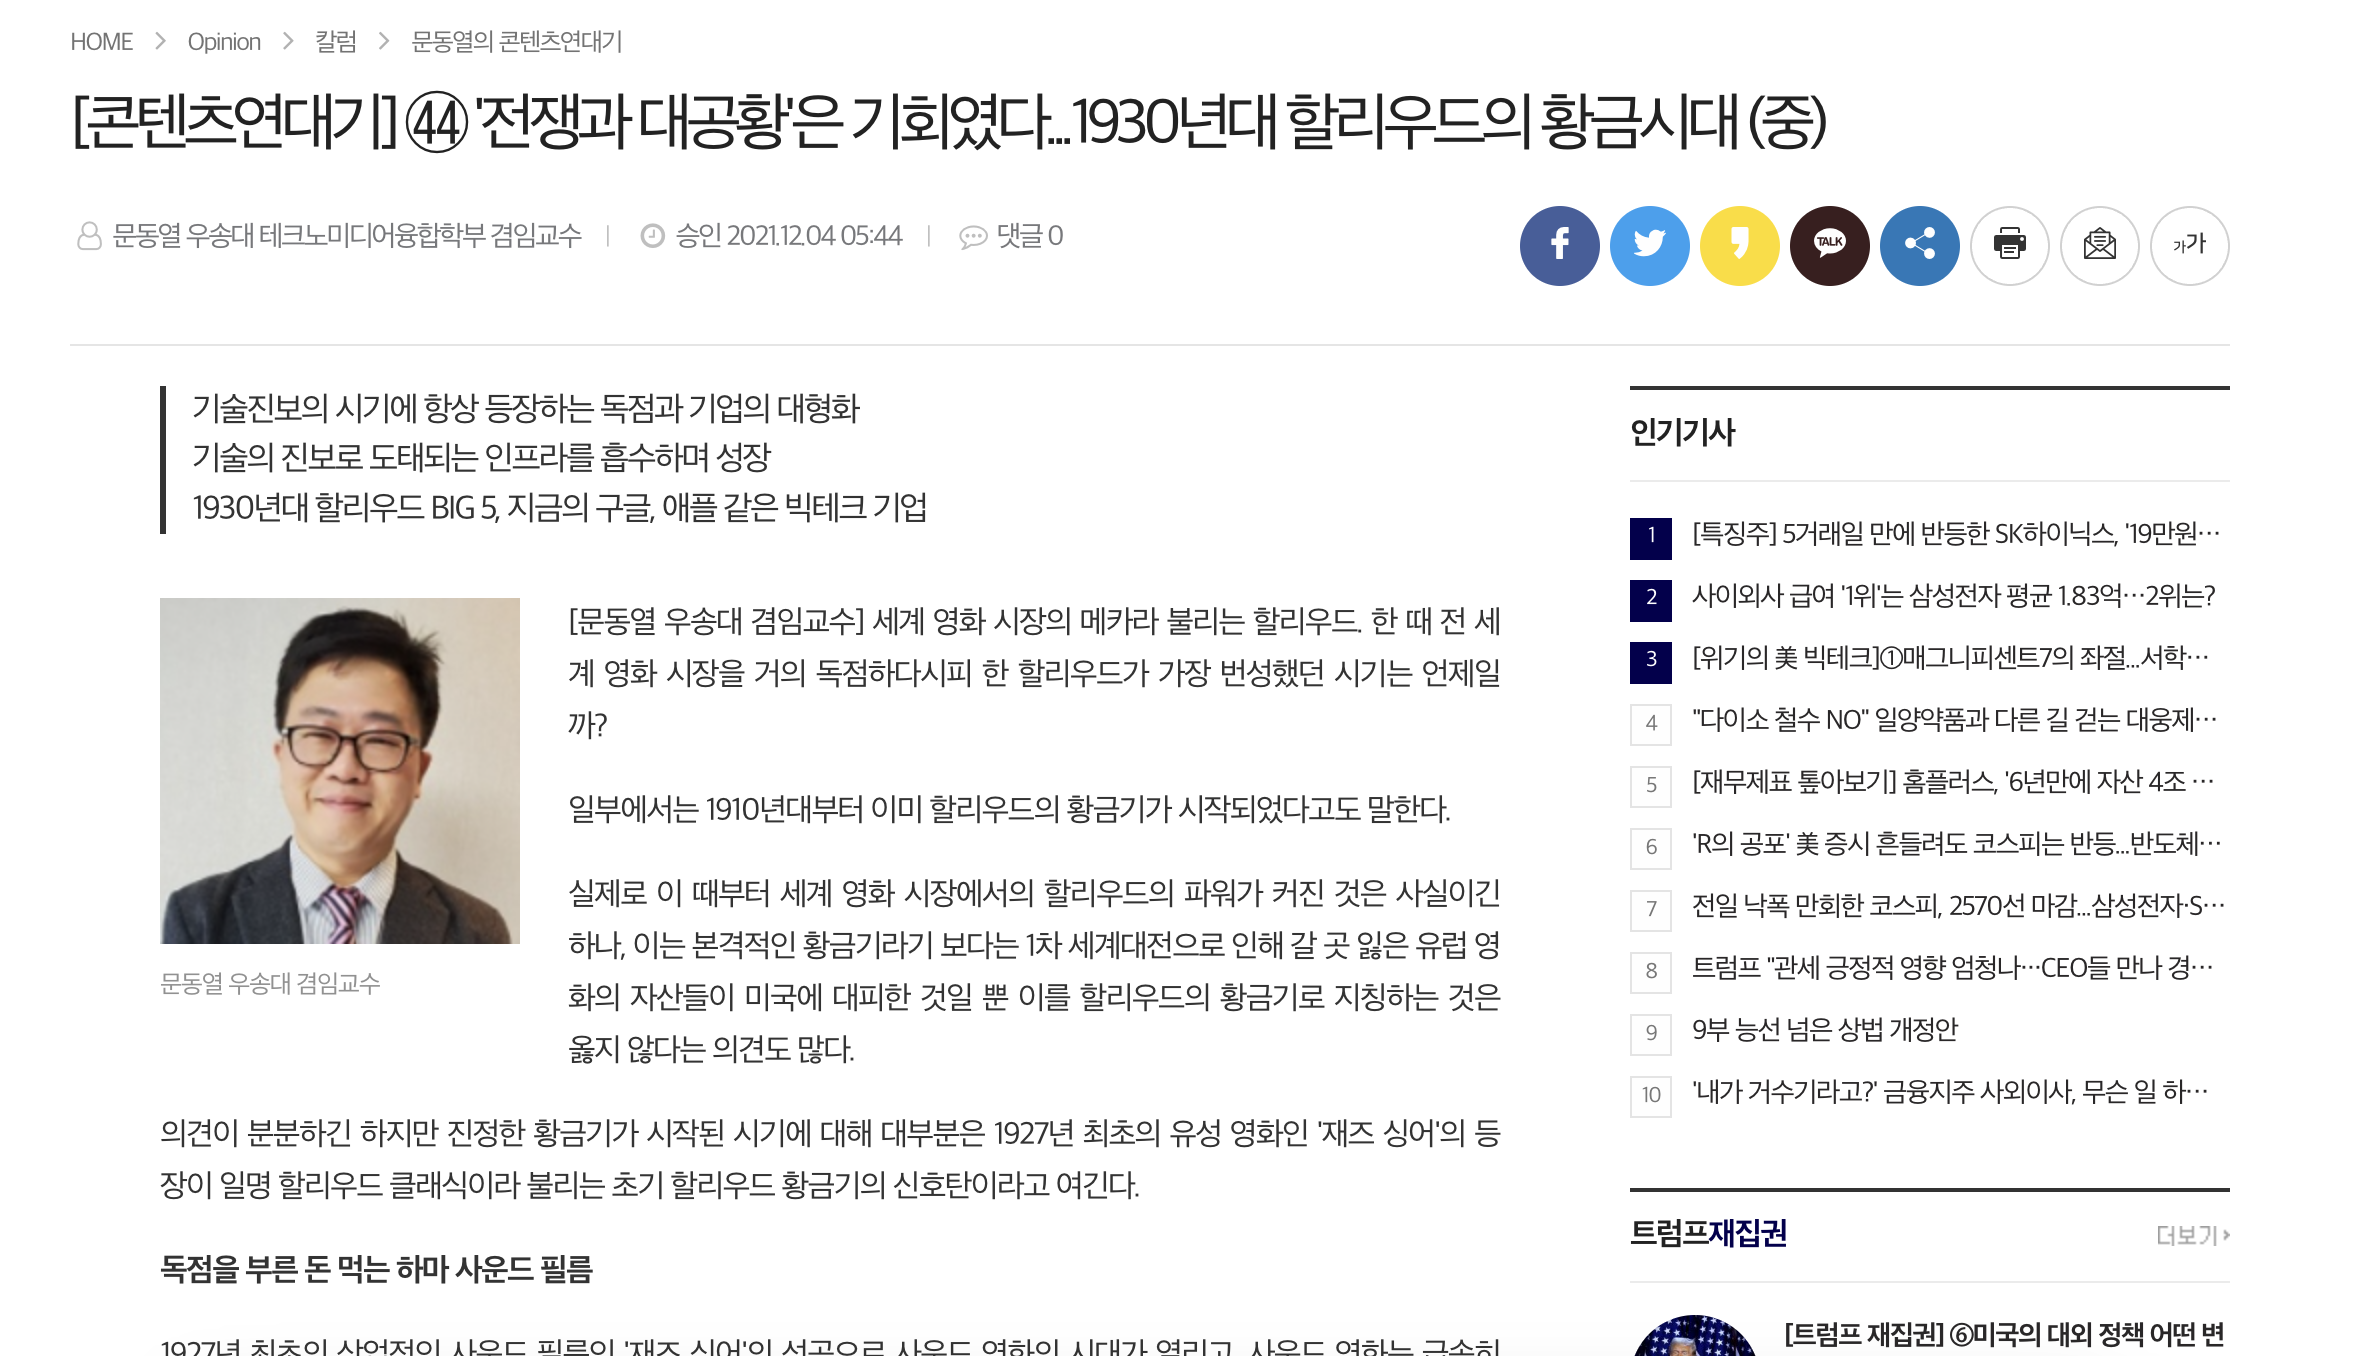
1. **1930~1940년대 : 급격한 수익 증가**

그래프에서 가장 두드러진 특징은 1940년대 초반에 평균 영화 수익이 급격히 증가했다는 점입니다. 
이는 당시 전쟁과 관련된 요인이 영향을 미쳤을 가능성이 큽니다. 제2차 세계대전 기간 동안 영화는 중요한 대중 매체로 자리 잡았으며, 전쟁 선전 및 대중의 관심을 끌기 위한 콘텐츠가 많이 제작되었습니다.


2. **1950~1970년대 : 안정화**

1950년대 이후에는 평균 수익이 비교적 낮아지고 안정적인 흐름을 보입니다.
이 시기는 텔레비전의 보급으로 인해 영화 산업이 경쟁 압박을 받던 시기입니다. 그러나 동시에 컬러 영화와 새로운 기술적 혁신이 등장하며 점진적인 회복세를 보였습니다.


3. **1980~2000년대 : 현대 영화 산업**

1980년대 이후부터는 평균 수익이 다시 상승하는 경향을 보이며, 이후 안정적인 흐름을 유지합니다. 
디지털 기술과 CGI(컴퓨터 그래픽)의 발전으로 제작비가 증가했지만, 관객들에게 더 큰 흥미를 제공하며 높은 수익을 창출했습니다.


4. **최근(2000~2020)의 변화**

그래프에서 최근 몇 년간은 비교적 안정적인 수익 수준을 유지하고 있습니다. 
이는 스트리밍 서비스와 같은 새로운 플랫폼의 등장으로 인해 극장 중심의 전통적 영화 산업이 변화하고 있다는 것을 반영할 수 있습니다.

---
### 시즌별 영화 흥행 요인 분석

#### 월별로 영화 흥행률이 다른가?

In [ ]:
df2=processed_df

In [ ]:
# release_date 컬럼에서 월을 추출
df2['month'] = pd.to_datetime(df2['release_date']).dt.month

# 월별 개봉 영화 수와 평균 수익 계산
monthly_data = df2.groupby('month')['adjusted_revenue'].agg(['count', 'mean']).reset_index()
monthly_data.columns = ['month', 'count', 'mean_revenue']

# # 월별 개봉 영화 수 시각화
# plt.figure(figsize=(10, 6))
# plt.subplot(1, 2, 1)
# plt.bar(monthly_data['month'], monthly_data['count'])
# plt.title('월별 개봉 영화 수')
# plt.xlabel('월')
# plt.ylabel('개봉 영화 수')

# 평균 수익 시각화
plt.figure(figsize=(14, 8))
plt.bar(monthly_data['month'], monthly_data['mean_revenue'])

# y축 포맷팅
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('월별 평균 수익')
plt.xlabel('월')
plt.ylabel('평균 수익')
plt.tight_layout()
plt.show()

개봉 영화 수가 많다고 해서 반드시 평균 수익이 높은 것은 아닙니다.

**여름(6~8월)과 연말(12월)은 극장가의 성수기**로, 흥행작들이 많이 개봉해 높은 수익을 기록합니다.

반대로 **봄(3~5월)과 가을(9~10월)은 상대적으로 비수기**로, 중소규모 영화가 주를 이루며 평균 수익도 낮습니다.

이러한 데이터는 영화 배급사나 제작자가 전략적으로 개봉 시기를 결정하는 데 중요한 참고 자료가 될 수 있습니다.

---
#### 어떤 장르가 어느 시즌에 흥행이 더 잘 되는가?

In [ ]:
genres_df=get_genre_df(df2)
genres_df

In [ ]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df2['season'] = df2['month'].apply(get_season)

# 장르별 계절별 흥행 지표 합산
genre_seasonal_ROI = []
for _, row in genres_df.iterrows():
    genre_name = row['name']
    for movie_id in row['movie_id']:
        movie_seasons = df2[df2['movie_id'] == movie_id]
        for _, movie_season in movie_seasons.iterrows():
            genre_seasonal_ROI.append({
                'genre': genre_name,
                'season': movie_season['season'],
                'ROI': movie_season['ROI']
            })

genre_seasonal_ROI_df = pd.DataFrame(genre_seasonal_ROI)

top_genres = ['Adventure','Fantasy','Animation'	,'Drama','Horror','Action','Comedy','Crime','Science Fiction','Romance','War','Family']
# filtered_result = genre_seasonal_ROI_df[genre_seasonal_ROI_df['genre'].isin(top_genres)]


genre_seasonal_ROI_df['clipped_ROI'] = genre_seasonal_ROI_df['ROI'].clip(upper=10000)

plt.figure(figsize=(14, 8))

# Barplot 생성
sns.barplot(data=genre_seasonal_ROI_df[genre_seasonal_ROI_df['genre'].isin(top_genres)], 
            x='season', y='clipped_ROI', hue='genre', errorbar=None)

plt.title('Clipped Average ROI by Season for Top Movie Genres')
plt.xlabel('Season')
plt.ylabel('Clipped Average ROI')
plt.legend(title='Genre')
plt.show()


1. 가을 시즌의 호러 및 미스터리 영화 ROI 상승

    여름 시즌에 호러, 미스터리 영화가 흥행할것이라고는 예상 했으나, 가을 시즌에 호러와 미스터리 영화의 ROI(Return on Investment)가 높은 이유는 할로윈 시즌의 영향 때문으로 보입니다. 할로윈은 전통적으로 공포 영화가 흥행하는 시기로, 관객들이 이 장르를 선호하는 경향이 강합니다26.

    또한, 호러 영화는 제작비가 상대적으로 낮고, ROI가 높게 나타나는 장르로 알려져 있습니다. 특히, 할로윈 시즌에는 이 장르가 더욱 주목받아 수익성이 극대화됩니다

2. 연말 시즌(겨울)의 로맨스 및 가족 영화

    연말 시즌에 로맨스와 가족 영화가 흥행할 것이라는 기대와 달리, 그래프에서는 해당 장르의 ROI가 두드러지지 않습니다.

    이는 최근 몇 년간 로맨스 장르의 영화들이 관객들 사이에서 덜 주목받고 있으며, 특히 젊은 세대는 불필요한 로맨스 요소를 선호하지 않는 경향이 있다는 점과 관련이 있을 수 있습니다.

<div style="position: relative; background-color: #EAEAEA; font-size: 20px; font-family: Georgia; border: 3px solid #FF5733; padding: 10px; margin: 10px 0; color: #333;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #FF5733; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
    <ul style="list-style-type: disc; padding-left: 20px;">
        <li style="margin-bottom: 10px;">결과 1</li>
        <li style="margin-bottom: 10px;">결과 2</li>
        <li style="margin-bottom: 10px;">결과 3</li>
    </ul>
</div>

## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">6| Communicate Results</div>

<a id='conclusions'></a>
<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 20px; background-color: #E8F6EF; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.1); text-align: left;">
    <h2 style="color: #17A05D; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-size: 24px; font-weight: bold; margin-bottom: 10px;">
        Conclusions</h2>
        <ol style="font-size: 18px; color: #333;">
            <li>결과1</li>
            <li>결과2</li>
            <li>결과3</li>
            <li>결과4</li>
        </ol>
</div>

<div style="background:#fff7f7;padding:10px;border-radius:6px;border:2px blue solid;margin:10px;">
  <h2>제한사항??</h2>
    <p>ex) null값이 많아 데이터가 정화하지 않아요..ㅠ
    </p>
</div>

<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/87481-of-thanks-letter-text-logo-calligraphy-drawing%20(1).png">